# Proyek Analisis Data: PRSA_Data_20130301-20170228
- Nama: Anisya Niken Ayu Ningtyas
- Email: anisyanikenxx@gmail.com
- Id Dicoding: anisyanikenayu
Notes. I suggest you to run this file on Jupyter Notebook, the graph is only run on it.

## Menentukan Pertanyaan Bisnis

- Kapan terjadi polusi udara terparah di stasiun Changping?
- Jenis emisi apa yang menjadi penyumbang polusi terbesar di stasiun Changping?

## Menyiapkan semua library yang dibutuhkan

In [36]:
# install library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
import zipfile
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pipreqs

## Data Wrangling

### Gathering Data

In [37]:
# membuka file csv
changping_ds = pd.read_csv('data/PRSA_Data_Changping_20130301-20170228.csv')
changping_ds.head(20)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping


### Assessing Data

In [38]:
changping_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [39]:
changping_ds.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,34924,35021.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4776,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,NaN,1.853836,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,NaN,1.309808,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [40]:
# cek duplicate
print("Jumlah data yang duplikat:", changping_ds.duplicated().sum())

Jumlah data yang duplikat: 0


In [41]:
# cek data yang NA
print("Jumlah data yang duplikat: \n", changping_ds.isna().sum())

Jumlah data yang duplikat: 
 No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64


In [42]:
# jumlah data yang unique
print("Jumlah data yang duplikat: \n", changping_ds.nunique())

Jumlah data yang duplikat: 
 No         35064
year           5
month         12
day           31
hour          24
PM2.5        481
PM10         562
SO2          294
NO2          459
CO           115
O3           886
TEMP         998
PRES         592
DEWP         602
RAIN         116
wd            16
WSPM          95
station        1
dtype: int64


### Cleaning Data

In [43]:
# mencari missing value PM2.5
def changping_pm25(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['PM2.5'].isna().sum())
    changping_ds['PM2.5'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['PM2.5'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_pm25(changping_ds)

Jumlah missing values sebelum interpolasi: 774
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO   O3  \
34879  34880  2017      2   21     7   45.0    NaN   NaN   NaN     NaN  NaN   
34880  34881  2017      2   21     8   59.0    NaN   NaN   NaN     NaN  NaN   
34881  34882  2017      2   21     9   73.0  117.0  51.0  89.0  2400.0  2.0   
34882  34883  2017      2   21    10   71.0  110.0  37.0  84.0  2200.0  2.0   
34883  34884  2017      2   21    11   83.0    NaN   NaN   NaN     NaN  NaN   
34884  34885  2017      2   21    12   95.0  149.0  34.0  85.0  2200.0  3.0   
34885  34886  2017      2   21    13   94.0    NaN   NaN   NaN     NaN  NaN   
34886  34887  2017      2   21    14   93.0  126.0  16.0  94.0  2100.0  2.0   
34887  34888  2017      2   21    15   85.5    6.0   NaN  34.0     NaN  2.0   
34888  34889  2017      2   21    16   78.0   78.0   3.0   2.0   200.0  NaN   
34889  34890  2017      2   21    17   

In [44]:
# mencari missing value PM10
def changping_pm10(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['PM10'].isna().sum())
    changping_ds['PM10'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['PM10'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_pm10(changping_ds)

Jumlah missing values sebelum interpolasi: 582
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10   SO2   NO2      CO   O3  \
34879  34880  2017      2   21     7   45.0   73.0   NaN   NaN     NaN  NaN   
34880  34881  2017      2   21     8   59.0   95.0   NaN   NaN     NaN  NaN   
34881  34882  2017      2   21     9   73.0  117.0  51.0  89.0  2400.0  2.0   
34882  34883  2017      2   21    10   71.0  110.0  37.0  84.0  2200.0  2.0   
34883  34884  2017      2   21    11   83.0  129.5   NaN   NaN     NaN  NaN   
34884  34885  2017      2   21    12   95.0  149.0  34.0  85.0  2200.0  3.0   
34885  34886  2017      2   21    13   94.0  137.5   NaN   NaN     NaN  NaN   
34886  34887  2017      2   21    14   93.0  126.0  16.0  94.0  2100.0  2.0   
34887  34888  2017      2   21    15   85.5    6.0   NaN  34.0     NaN  2.0   
34888  34889  2017      2   21    16   78.0   78.0   3.0   2.0   200.0  NaN   
34889  34890  2017      2   21    17   

In [45]:
# mencari missing value SO2
def changping_SO2(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['SO2'].isna().sum())
    changping_ds['SO2'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['SO2'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_SO2(changping_ds)

Jumlah missing values sebelum interpolasi: 628
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2   NO2      CO  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667   NaN     NaN   
34880  34881  2017      2   21     8   59.0   95.0  39.333333   NaN     NaN   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.0  2400.0   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.0  2200.0   
34883  34884  2017      2   21    11   83.0  129.5  35.500000   NaN     NaN   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.0  2200.0   
34885  34886  2017      2   21    13   94.0  137.5  25.000000   NaN     NaN   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.0  2100.0   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.0     NaN   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.0   200.0   
34889  34890  2017      2   21    17   

In [46]:
# mencari missing value NO2
def changping_NO2(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['NO2'].isna().sum())
    changping_ds['NO2'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['NO2'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_NO2(changping_ds)

Jumlah missing values sebelum interpolasi: 667
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.500000

In [47]:
# mencari missing value CO
def changping_CO(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['CO'].isna().sum())
    changping_ds['CO'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['CO'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_CO(changping_ds)

Jumlah missing values sebelum interpolasi: 1521
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.50000

In [48]:
# mencari missing value O3
def changping_O3(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['O3'].isna().sum())
    changping_ds['O3'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['O3'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_O3(changping_ds)

Jumlah missing values sebelum interpolasi: 604
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.500000

In [49]:
# mencari missing value TEMP
def changping_TEMP(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['TEMP'].isna().sum())
    changping_ds['TEMP'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['TEMP'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_TEMP(changping_ds)

Jumlah missing values sebelum interpolasi: 53
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.500000 

In [50]:
# mencari missing value PRES
def changping_PRES(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['PRES'].isna().sum())
    changping_ds['PRES'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['PRES'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_PRES(changping_ds)

Jumlah missing values sebelum interpolasi: 50
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.500000 

In [51]:
# mencari missing value DEWP
def changping_DEWP(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['DEWP'].isna().sum())
    changping_ds['DEWP'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['DEWP'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_DEWP(changping_ds)

Jumlah missing values sebelum interpolasi: 53
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.500000 

In [52]:
# mencari missing value RAIN
def changping_RAIN(changping_ds):
    print("Jumlah missing values sebelum interpolasi:", changping_ds['RAIN'].isna().sum())
    changping_ds['RAIN'].interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
    print("Jumlah missing values setelah interpolasi:", changping_ds['RAIN'].isna().sum())
    print(changping_ds.iloc[34879:34890])
changping_RAIN(changping_ds)

Jumlah missing values sebelum interpolasi: 51
Jumlah missing values setelah interpolasi: 0
          No  year  month  day  hour  PM2.5   PM10        SO2        NO2  \
34879  34880  2017      2   21     7   45.0   73.0  27.666667  75.666667   
34880  34881  2017      2   21     8   59.0   95.0  39.333333  82.333333   
34881  34882  2017      2   21     9   73.0  117.0  51.000000  89.000000   
34882  34883  2017      2   21    10   71.0  110.0  37.000000  84.000000   
34883  34884  2017      2   21    11   83.0  129.5  35.500000  84.500000   
34884  34885  2017      2   21    12   95.0  149.0  34.000000  85.000000   
34885  34886  2017      2   21    13   94.0  137.5  25.000000  89.500000   
34886  34887  2017      2   21    14   93.0  126.0  16.000000  94.000000   
34887  34888  2017      2   21    15   85.5    6.0   9.500000  34.000000   
34888  34889  2017      2   21    16   78.0   78.0   3.000000   2.000000   
34889  34890  2017      2   21    17   96.0   96.0   8.000000  42.500000 

In [53]:
# mencari missing value wd
def changping_wd (changping_ds):
    print("Jumlah missing value sebelum dipenuhi dengan nilai tertentu: ", changping_ds['wd'].isna().sum())
    mode_wd = changping_ds.wd.mode().iloc[0]
    print("Missing value diganti dengan jenis: ", mode_wd)
    changping_ds['wd'].fillna(value=mode_wd, inplace=True)
    print("Jumlah missing value setelah dipenuhi dengan nilai tertentu: ", changping_ds['wd'].isna().sum())
changping_wd(changping_ds)

Jumlah missing value sebelum dipenuhi dengan nilai tertentu:  140
Missing value diganti dengan jenis:  NNW
Jumlah missing value setelah dipenuhi dengan nilai tertentu:  0


In [54]:
# mengubah tanggal menjadi format tanggal
changping_ds['date'] = pd.to_datetime(changping_ds[['year', 'month', 'day', 'hour']])
changping_ds.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping,2013-03-01 05:00:00
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping,2013-03-01 06:00:00
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping,2013-03-01 07:00:00
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping,2013-03-01 08:00:00
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping,2013-03-01 09:00:00


In [55]:
# download data in csv form
changping_ds.to_csv("all_data_changping.csv", index=False)

In [56]:
# mencari outlier dari setiap atribut
def outlier_SO2(changping_ds):
    q25, q75 = np.percentile(changping_ds["SO2"], 25), np.percentile(changping_ds["SO2"], 75)
    iqr = q75 - q25
    # Hitung batas bawah dan atas untuk outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    # mengganti nilai outlier dengan batas bawah dan batas atas
    changping_ds["SO2"] = np.clip(changping_ds["SO2"], minimum, maximum)
    
def outlier_PM25(changping_ds):
    q25, q75 = np.percentile(changping_ds["PM2.5"], 25), np.percentile(changping_ds["PM2.5"], 75)
    iqr = q75 - q25
    # Hitung batas bawah dan atas untuk outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    # mengganti nilai outlier dengan batas bawah dan batas atas
    changping_ds["PM2.5"] = np.clip(changping_ds["PM2.5"], minimum, maximum)
    
def outlier_PM10(changping_ds):
    q25, q75 = np.percentile(changping_ds["PM10"], 25), np.percentile(changping_ds["PM10"], 75)
    iqr = q75 - q25
    # Hitung batas bawah dan atas untuk outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    # mengganti nilai outlier dengan batas bawah dan batas atas
    changping_ds["PM10"] = np.clip(changping_ds["PM10"], minimum, maximum)
    
def outlier_NO2(changping_ds):
    q25, q75 = np.percentile(changping_ds["NO2"], 25), np.percentile(changping_ds["NO2"], 75)
    iqr = q75 - q25
    # Hitung batas bawah dan atas untuk outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    # mengganti nilai outlier dengan batas bawah dan batas atas
    changping_ds["NO2"] = np.clip(changping_ds["NO2"], minimum, maximum)

def outlier_CO(changping_ds):
    q25, q75 = np.percentile(changping_ds["CO"], 25), np.percentile(changping_ds["CO"], 75)
    iqr = q75 - q25
    # Hitung batas bawah dan atas untuk outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    # mengganti nilai outlier dengan batas bawah dan batas atas
    changping_ds["CO"] = np.clip(changping_ds["CO"], minimum, maximum)

def outlier_O3(changping_ds):
    q25, q75 = np.percentile(changping_ds["O3"], 25), np.percentile(changping_ds["O3"], 75)
    iqr = q75 - q25
    # Hitung batas bawah dan atas untuk outlier
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off
    # mengganti nilai outlier dengan batas bawah dan batas atas
    changping_ds["O3"] = np.clip(changping_ds["O3"], minimum, maximum)

# mengaplikasikan fungsi
outlier_SO2(changping_ds)
outlier_PM25(changping_ds)
outlier_PM10(changping_ds)
outlier_NO2(changping_ds)
outlier_CO(changping_ds)
outlier_O3(changping_ds)

## Exploratory Data Analysis (EDA)

In [57]:
# pivot table berdasarkan tahun dengan mean atribut
changping_ds.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,70.264025,90.176403,15.832471,40.580926,986.749728,58.867431
2014,75.311992,103.958333,15.909589,45.664777,1103.259824,60.024409
2015,66.025759,88.517725,10.261050,42.281650,1019.994292,56.522156
2016,59.423782,83.961350,7.961293,44.963377,1032.667350,52.241689
2017,71.695621,87.449153,15.548729,49.643362,1214.371469,33.010593


In [58]:
# pivot table berdasarkan tahun dan bulan dengan mean atribut
changping_ds.groupby(['year','month']).agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

PM2.5        PM10        SO2        NO2           CO  \
year month                                                              
2013 3       93.301075  118.628360  25.256048  57.520198  1318.149194   
     4       59.123611   89.672917  15.328658  36.707678   774.875694   
     5       80.654570  116.680108  20.440604  37.691330   776.357527   
     6       78.434722  100.708333  12.413144  31.729585  1081.263699   
     7       61.912634   64.951613   6.546248  24.684136   821.655425   
     8       55.196237   67.436156   7.033788  23.858521   783.938172   
     9       70.169444   82.828472   6.717140  41.818361   966.243056   
     10      78.924731   99.016801  11.676347  55.059198   960.201613   
     11      59.579167   81.237500  21.354532  46.943730  1039.597222   
     12      64.900538   80.401882  31.315733  49.631226  1342.473118   
2014 1       84.076837  107.362903  35.198253  55.982527  1616.943630   
     2      122.012649  138.228423  35.400298  59.815104  1797.172619   
     3       81.096774  123.625000  26.564516  53.381048  1245.631720   
     4      101.242361  136.903472  15.615972  49.039583   879.097222   
     5       53.625806   98.276210  11.906855  36.284946   743.682796   
     6       46.043750   60.474306   5.326389  31.381944   692.291667   
     7       75.883737  101.581317   5.452957  32.655242   878.830645   
     8       56.544758   75.973790   4.749597  35.963978   746.908602   
     9       60.418750   78.765972   5.325694  35.160833   913.263889   
     10     102.015457  129.340054   6.497984  56.014113  1250.000000   
     11      72.957963  111.017361  16.875139  55.525972  1353.263889   
     12      51.680444   88.342742  23.226478  47.768817  1170.631720   
2015 1       87.603360  109.175269  28.192876  62.171371  1608.938172   
     2       82.968750  106.486855  22.616071  44.171875  1256.473214   
     3       76.469422  133.713978  18.749731  47.476815  1121.102151   
     4       60.760417   96.906944   6.097917  36.069444   678.125000   
     5       54.471774   86.774866   6.018817  28.278898   636.491935   
     6       57.017361   74.175694   4.554861  24.233333   735.902778   
     7       56.084677   66.596102   4.258065  23.262097   604.569892   
     8       38.620968   54.834005   2.750000  22.390457   502.352151   
     9       42.835417   50.772917   4.153472  38.066667   729.583333   
     10      43.297715   61.538306   4.882392  48.304435   876.075269   
     11      89.122917   98.144444   7.459722  59.142361  1665.833333   
     12     104.232527  123.733199  13.988575  73.620296  1838.642473   
2016 1       53.683468   79.364919  15.916667  55.038978  1290.860215   
     2       35.836207   55.744253  11.911638  43.661638   885.057471   
     3       67.483871  118.268817  12.324597  58.989651  1066.129032   
     4       56.819444  102.843750   7.385417  43.180556   744.375000   
     5       50.704435   77.020565   6.170430  34.459812   593.064516   
     6       52.906806   67.348889   3.941250  31.644306   649.527778   
     7       54.863575   67.905914   3.024194  27.223790   955.846774   
     8       36.665995   52.621640   2.894489  27.684812   879.502688   
     9       44.556944   57.215972   3.323611  36.842361   792.777778   
     10      77.628360   95.393817   3.428495  53.086694  1150.403226   
     11      84.298611  115.779861   9.994028  60.859028  1604.930556   
     12      96.144489  116.444220  15.243280  66.568548  1759.072581   
2017 1       84.266129  101.354167  16.009409  52.925403  1350.672043   
     2       57.778274   72.054315  15.038690  46.009673  1063.467262   

                    O3  
year month              
2013 3       59.846282  
     4       67.405341  
     5       89.813709  
     6       77.389045  
     7       75.773687  
     8       83.477985  
     9       53.442152  
     10      29.795191  
     11      26.514037  
     12      24.871095  
2014 1       25.971102  
     2       26.008929  
     3       43.

In [59]:
changping_ds.head(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,date
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping,2013-03-01 00:00:00
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping,2013-03-01 01:00:00
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping,2013-03-01 04:00:00
5,6,2013,3,1,5,3.0,3.0,10.0,17.0,400.0,71.0,-4.5,1022.6,-19.5,0.0,NNW,1.7,Changping,2013-03-01 05:00:00
6,7,2013,3,1,6,4.0,6.0,12.0,22.0,500.0,65.0,-4.5,1023.4,-19.5,0.0,NNW,1.8,Changping,2013-03-01 06:00:00
7,8,2013,3,1,7,3.0,6.0,25.0,39.0,600.0,48.0,-2.1,1024.6,-20.0,0.0,NW,2.5,Changping,2013-03-01 07:00:00
8,9,2013,3,1,8,9.0,25.0,13.0,42.0,700.0,46.0,-0.2,1025.2,-20.5,0.0,NNW,2.8,Changping,2013-03-01 08:00:00
9,10,2013,3,1,9,11.0,29.0,5.0,18.0,500.0,73.0,0.6,1025.3,-20.4,0.0,NNW,3.8,Changping,2013-03-01 09:00:00


In [60]:
# rata-rata kualitas udara per hari
daily_air_quality_all = changping_ds.resample(rule='D', on='date').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean'
}).reset_index()
print(daily_air_quality_all)

           date       PM2.5        PM10        SO2        NO2           CO  \
0    2013-03-01    5.083333   18.958333  16.000000  15.333333   387.500000   
1    2013-03-02   33.333333   39.833333  37.104167  60.312500   954.166667   
2    2013-03-03   57.541667   82.666667  30.416667  58.791667  1254.000000   
3    2013-03-04   20.791667   36.166667  21.333333  30.250000   583.333333   
4    2013-03-05  106.958333  125.166667  38.250000  74.625000  1641.333333   
...         ...         ...         ...        ...        ...          ...   
1456 2017-02-24   18.708333   27.791667   9.958333  30.541667   562.500000   
1457 2017-02-25   14.000000   20.875000   8.125000  31.208333   604.166667   
1458 2017-02-26   33.083333   47.250000  12.666667  48.416667   804.166667   
1459 2017-02-27   51.250000   69.625000  12.166667  63.708333  1033.333333   
1460 2017-02-28   14.333333   27.583333   7.541667  24.791667   556.250000   

             O3  
0     77.791667  
1     29.083333  
2     31.

In [61]:
# rata-rata AQI per bulan
monthly_air_quality_all = daily_air_quality_all.resample(rule='M', on='date').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'SO2': 'mean',
    'NO2': 'mean',
    'CO': 'mean',
    'O3': 'mean',
}).reset_index()
print(monthly_air_quality_all)

         date       PM2.5        PM10        SO2        NO2           CO  \
0  2013-03-31   93.301075  118.628360  25.256048  57.520198  1318.149194   
1  2013-04-30   59.123611   89.672917  15.328658  36.707678   774.875694   
2  2013-05-31   80.654570  116.680108  20.440604  37.691330   776.357527   
3  2013-06-30   78.434722  100.708333  12.413144  31.729585  1081.263699   
4  2013-07-31   61.912634   64.951613   6.546248  24.684136   821.655425   
5  2013-08-31   55.196237   67.436156   7.033788  23.858521   783.938172   
6  2013-09-30   70.169444   82.828472   6.717140  41.818361   966.243056   
7  2013-10-31   78.924731   99.016801  11.676347  55.059198   960.201613   
8  2013-11-30   59.579167   81.237500  21.354532  46.943730  1039.597222   
9  2013-12-31   64.900538   80.401882  31.315733  49.631226  1342.473118   
10 2014-01-31   84.076837  107.362903  35.198253  55.982527  1616.943630   
11 2014-02-28  122.012649  138.228423  35.400298  59.815104  1797.172619   
12 2014-03-3

### Geoanalytics Analysis

The Air Quality Index (AQI) Analysis Calculation
Air quality consist of 6 categories:
1. If concentration >= 0 &&  concentration <= 12, AQI = 50 [Good]
2. If concentration >= 12.1 &&  concentration <= 35.4, AQI = 100 [Moderate]
3. If concentration >= 35.5 &&  concentration <= 55.4, AQI = 150 [Unhealthy for Sensitive Groups]
4. If concentration >= 55.5 &&  concentration <= 150.4, AQI = 200 [Unhealthy]
5. If concentration >= 150.5 &&  concentration <= 250.4, AQI = 300 [Very Unhealthy]
6. If concentration >= 250.5 &&  concentration <= 5000, AQI = 500 [Hazardous]

The number of concentration taken from the highest number concentration among attributes ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3'].

#### Calculate Hourly AQI

In [62]:
import pandas as pd

# Get hourly AQI

breakpoints = [(0, 12, 50), (12.1, 35.4, 100), (35.5, 55.4, 150), (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 5000, 500)]
    
def calculate_aqi(pollutant_name, concentration):
        for low, high, aqi in breakpoints:
            if low <= concentration <= high:
                return aqi
        return None
    
def calculate_aqi_all(row):
        aqi_values = []
        concentrations = []
        pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
        for pollutant in pollutants:
            concentration = row[pollutant]
            aqi = calculate_aqi(pollutant, concentration)
            if aqi is not None:
                aqi_values.append(aqi)
                concentrations.append(concentration)
        max_aqi = max(aqi_values, default=None)
        max_concentration = max(concentrations, default=None)
        return max_aqi, max_concentration

aqi_categories = [
        (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
        (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
    ]
    
def categorize_aqi(values_aqi):
        for low, high, category in aqi_categories:
            if low <= values_aqi <= high:
                return category
        return None

    # Apply the functions to create new columns
changping_ds[['AQI', 'Concentration']] = changping_ds.apply(calculate_aqi_all, axis=1, result_type='expand')
    # Add Condition column based on AQI
changping_ds['Condition'] = changping_ds['AQI'].apply(categorize_aqi)
print(changping_ds.tail(10))


          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  \
35054  35055  2017      2   28    14    8.0  15.0  5.0  18.0  400.0  ...   
35055  35056  2017      2   28    15   13.0  29.0  6.0  21.0  400.0  ...   
35056  35057  2017      2   28    16   15.0  37.0  6.0  22.0  400.0  ...   
35057  35058  2017      2   28    17   18.0  61.0  6.0  29.0  400.0  ...   
35058  35059  2017      2   28    18   18.0  57.0  5.0   2.0  350.0  ...   
35059  35060  2017      2   28    19   28.0  47.0  4.0  14.0  300.0  ...   
35060  35061  2017      2   28    20   12.0  12.0  3.0  23.0  500.0  ...   
35061  35062  2017      2   28    21    7.0  23.0  5.0  17.0  500.0  ...   
35062  35063  2017      2   28    22   11.0  20.0  3.0  15.0  500.0  ...   
35063  35064  2017      2   28    23   20.0  25.0  6.0  28.0  900.0  ...   

         PRES  DEWP  RAIN   wd  WSPM    station                date    AQI  \
35054  1008.4 -12.4   0.0  WNW   4.2  Changping 2017-02-28 14:00:00  500.0   
35055  

#### Calculate Daily AQI

In [63]:
import pandas as pd

# Get the AQI for daily

breakpoints = [(0, 12, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
               (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 5000, 500)]

# Function to calculate AQI and concentration
def calculate_aqi_all(row):
    aqi_values = []
    concentrations = []
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    for pollutant in pollutants:
        concentration = row[pollutant]
        aqi = calculate_aqi(pollutant, concentration)
        if aqi is not None:
            aqi_values.append(aqi)
            concentrations.append(concentration)
    max_aqi = max(aqi_values, default=None)
    max_concentration = max(concentrations, default=None)
    return max_aqi, max_concentration

aqi_categories = [
        (0, 50, 'Good'), (51, 100, 'Moderate'), (101, 150, 'Unhealthy for Sensitive Groups'),
        (151, 200, 'Unhealthy'), (201, 300, 'Very Unhealthy'), (301, 500, 'Hazardous')
    ]

# Function to categorize AQI
def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Apply the functions to create new columns
daily_air_quality_all[['AQI', 'Concentration']] = daily_air_quality_all.apply(calculate_aqi_all, axis=1, result_type='expand')

# Add Condition column based on AQI
daily_air_quality_all['Condition'] = daily_air_quality_all['AQI'].apply(categorize_aqi)

print(daily_air_quality_all.head(20))

         date       PM2.5        PM10        SO2         NO2           CO  \
0  2013-03-01    5.083333   18.958333  16.000000   15.333333   387.500000   
1  2013-03-02   33.333333   39.833333  37.104167   60.312500   954.166667   
2  2013-03-03   57.541667   82.666667  30.416667   58.791667  1254.000000   
3  2013-03-04   20.791667   36.166667  21.333333   30.250000   583.333333   
4  2013-03-05  106.958333  125.166667  38.250000   74.625000  1641.333333   
5  2013-03-06  201.458333  234.520833  42.000000  105.937500  2622.770833   
6  2013-03-07  189.333333  220.291667  42.000000  107.041667  2533.291667   
7  2013-03-08  164.125000  214.500000  41.208333   86.001142  1987.354167   
8  2013-03-09   58.250000  159.208333  21.541667   32.375000   937.416667   
9  2013-03-10   30.250000   50.125000  20.083333   34.291667   600.000000   
10 2013-03-11  123.958333  163.791667  39.000000   84.791667  1716.416667   
11 2013-03-12  137.833333  143.541667  34.541667   80.916667  1814.333333   

#### Calculate Monthly AQI

In [64]:
import pandas as pd

# Get monthly AQI

breakpoints = [(0, 12, 50), (12.1, 35.4, 100), (35.5, 55.4, 150),
               (55.5, 150.4, 200), (150.5, 250.4, 300), (250.5, 2000, 500)]

# Function to calculate AQI and concentration
def calculate_aqi_all(row):
    aqi_values = []
    concentrations = []
    pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
    for pollutant in pollutants:
        concentration = row[pollutant]
        aqi = calculate_aqi(pollutant, concentration)
        if aqi is not None:
            aqi_values.append(aqi)
            concentrations.append(concentration)
    max_aqi = max(aqi_values, default=None)
    max_concentration = max(concentrations, default=None)
    return max_aqi, max_concentration

# Function to categorize AQI
def categorize_aqi(aqi_value):
    for low, high, category in aqi_categories:
        if low <= aqi_value <= high:
            return category
    return None

# Apply the functions to create new columns
monthly_air_quality_all[['AQI', 'Concentration']] = monthly_air_quality_all.apply(calculate_aqi_all, axis=1, result_type='expand')

# Add Condition column based on AQI
monthly_air_quality_all['Condition'] = monthly_air_quality_all['AQI'].apply(categorize_aqi)

print(monthly_air_quality_all.tail(10))


         date      PM2.5        PM10        SO2        NO2           CO  \
38 2016-05-31  50.704435   77.020565   6.170430  34.459812   593.064516   
39 2016-06-30  52.906806   67.348889   3.941250  31.644306   649.527778   
40 2016-07-31  54.863575   67.905914   3.024194  27.223790   955.846774   
41 2016-08-31  36.665995   52.621640   2.894489  27.684812   879.502688   
42 2016-09-30  44.556944   57.215972   3.323611  36.842361   792.777778   
43 2016-10-31  77.628360   95.393817   3.428495  53.086694  1150.403226   
44 2016-11-30  84.298611  115.779861   9.994028  60.859028  1604.930556   
45 2016-12-31  96.144489  116.444220  15.243280  66.568548  1759.072581   
46 2017-01-31  84.266129  101.354167  16.009409  52.925403  1350.672043   
47 2017-02-28  57.778274   72.054315  15.038690  46.009673  1063.467262   

           O3    AQI  Concentration  Condition  
38  82.067742  500.0     593.064516  Hazardous  
39  93.511944  500.0     649.527778  Hazardous  
40  88.094086  500.0     95

#### Number of Status Condition for Each Month

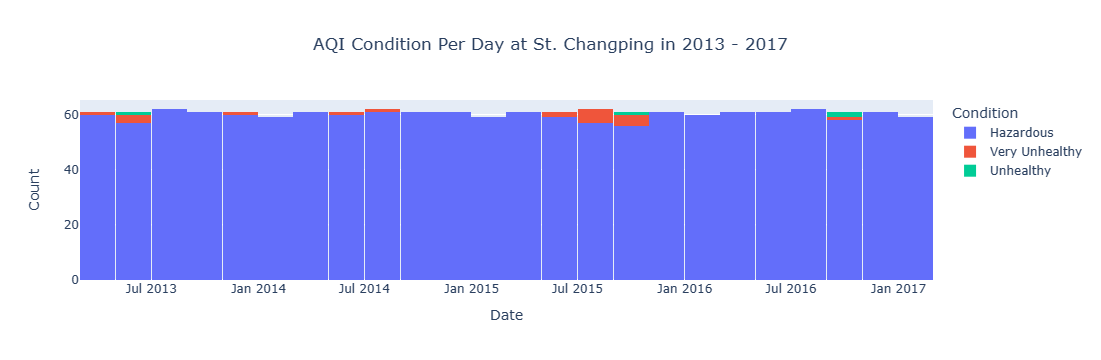

In [65]:
# AQI over time
fig = px.histogram(daily_air_quality_all, x="date", 
                    color="Condition", 
                    title="AQI Condition Per Day at St. Changping in 2013 - 2017")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Count")
fig.update_layout(title_x=0.5)
fig.show()

#### AQI Monthly Graph

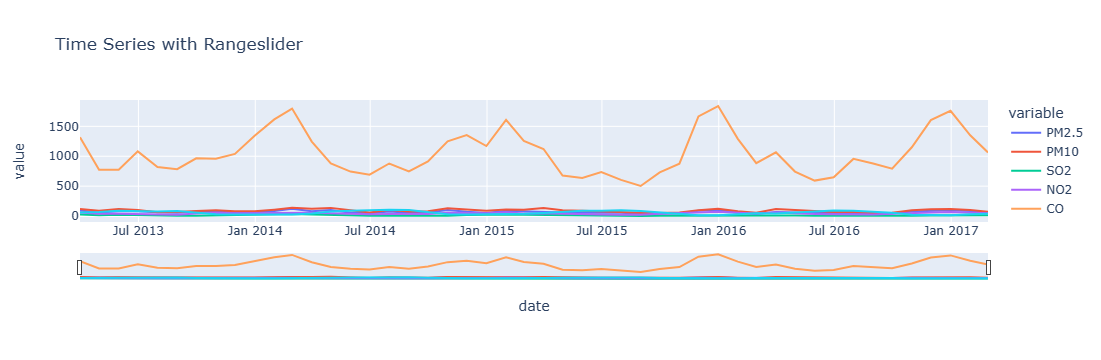

In [66]:
selected_columns = ['date', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
fig = px.line(monthly_air_quality_all, x='date', y= monthly_air_quality_all[selected_columns].columns, 
              hover_data={"date": "|%B %d, %Y"}, title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

#### Daily AQI Graph

In [67]:
# Looking for the biggest polutant

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

def highest_polutant(changping_ds):
    each_ctr = changping_ds[pollutants].sum()
    total_ctr = sum(each_ctr)
    persentage = []
    for i in each_ctr:
        persentage_c = [(i/total_ctr)*100]
        persentage += persentage_c
    total_persen = sum(persentage)
    # Create a DataFrame for the concentrations
    concentration_data = pd.DataFrame({
        "Concentration": each_ctr,
        "Persentage": persentage})
    print(concentration_data)
    print("Total concentration: ", total_ctr)
    print("Total persentage: ", total_persen)

highest_polutant(changping_ds)

       Concentration  Persentage
PM2.5   2.377637e+06    5.151497
PM10    3.209690e+06    6.954261
SO2     4.374775e+05    0.947859
NO2     1.533690e+06    3.322963
CO      3.663690e+07   79.379168
O3      1.958904e+06    4.244251
Total concentration:  46154295.63364088
Total persentage:  100.0


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan terjadi polusi udara terparah di stasiun Changping ?

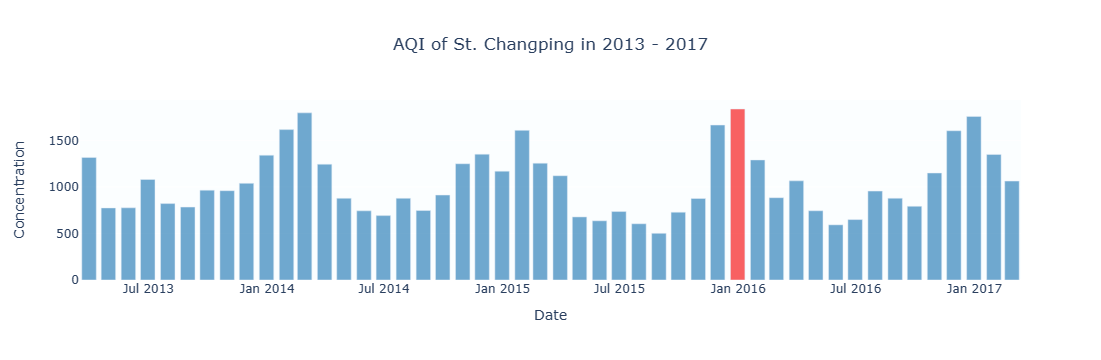

In [68]:
fig = px.bar(monthly_air_quality_all, x="date", y="Concentration", 
             title="AQI of St. Changping in 2013 - 2017")
fig.update_xaxes(title="Date")
fig.update_yaxes(title="Concentration")
max_aqi_index = monthly_air_quality_all['Concentration'].idxmax()
fig.update_traces(marker_color= ['rgba(247, 7, 7, 0.63)' if i == max_aqi_index else 'rgba(31, 119, 180, 0.63)' for i in range(len(monthly_air_quality_all))])
fig.update_layout(title_x=0.5)
fig.update_layout(plot_bgcolor='rgba(210, 239, 250, 0.09)')
fig.show()

### Pertanyaan 2: Jenis emisi apa yang menjadi penyumbang polusi terbesar di St. Changping ?

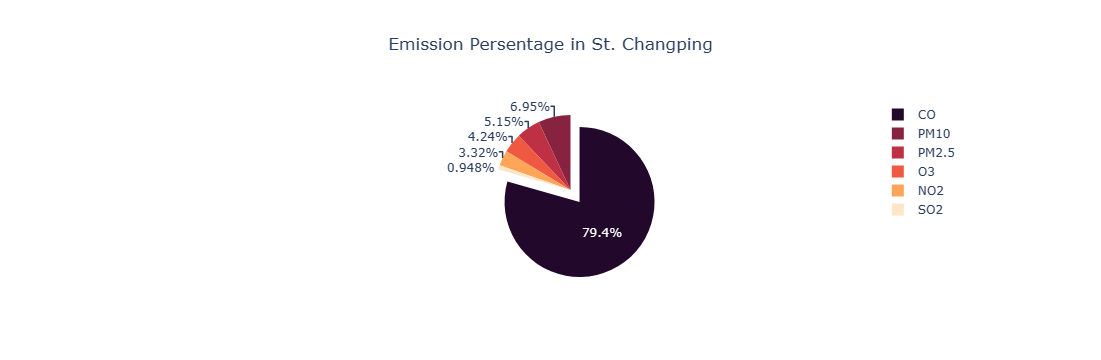

In [69]:
import plotly.graph_objects as go

pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
each_ctr = changping_ds[pollutants].sum()
colors = {'PM2.5': '#BE3144',
          'PM10': '#872341',
          'SO2': '#FFE6C7',
          'NO2': '#FFA559',
          'CO': '#22092C',
          'O3': '#F05941'}
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=pollutants, values=each_ctr, pull=[0, 0, 0, 0, 0.2, 0], marker_colors=[colors[p] for p in pollutants])])
fig.update_layout(title_text="Emission Persentage in St. Changping", title_x=0.5)
fig.show()


## Conclusion

- Berdasarkan hasil kalkulasi AQI (Air Quality Index) dengan beberapa indikator (emisi) pada tahun 2013 - 2017 dapat disimpulkan bahwa pada bulan Desember, 2015 terjadi polusi udara tertinggi di St. Changping.
- Berdasarkan hasil perhitungan emisi mulai tahun 2013 hingga 2017, gas karbon monoksida (CO) menjadi faktor utama dari terjadinya polusi udara di St. Changping.